In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("housing_data.csv")
df.isna().sum()

Size     0
Age      0
Price    0
dtype: int64

In [4]:
df.tail()

,Size,Age,Price
95,178,23,525.053155
96,185,40,600.371175
97,112,48,274.568043
98,188,48,581.622358
99,130,11,480.809927


## Câu 1: Xây dựng mô hình Linear Regression để dự đoán giá bán của căn nhà dựa trên hai yếu tố là Diện tích và Tuổi.

In [5]:
model = LinearRegression()
X = df.drop(columns=['Price'])
y = df['Price']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=60)

In [11]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Câu 2: Đánh giá độ hiệu quả của mô hình bằng chỉ số R2.

In [12]:
y_pred = model.predict(X_test)

In [13]:
r2 = r2_score(y_test, y_pred)
print(f'r2: {r2:.6f}')

r2: 0.986437


- Mô hình giải thích được ~98.64% sự thay đổi của giá nhà dựa trên 2 biến là diện tích và tuổi
    -> `Mô hình rất hiệu quả trong việc dự đoán giá nhà`

## Câu 3: Vẽ 02 biểu đồ Scatter Plot biểu diễn mối quan hệ giữa Diện tích và Tuổi với Giá nhà. Đánh giá yếu tố nào biểu thị mối tương quan rõ rệt hơn.

C:\Users\Admin\AppData\Local\Temp\ipykernel_27156\2847222995.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_temp[[c for c in features if c != col]] = X_test[[c for c in features if c != col]].mean()
C:\Users\Admin\AppData\Local\Temp\ipykernel_27156\2847222995.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_temp[[c for c in features if c != col]] = X_test[[c for c in features if c != col]].mean()


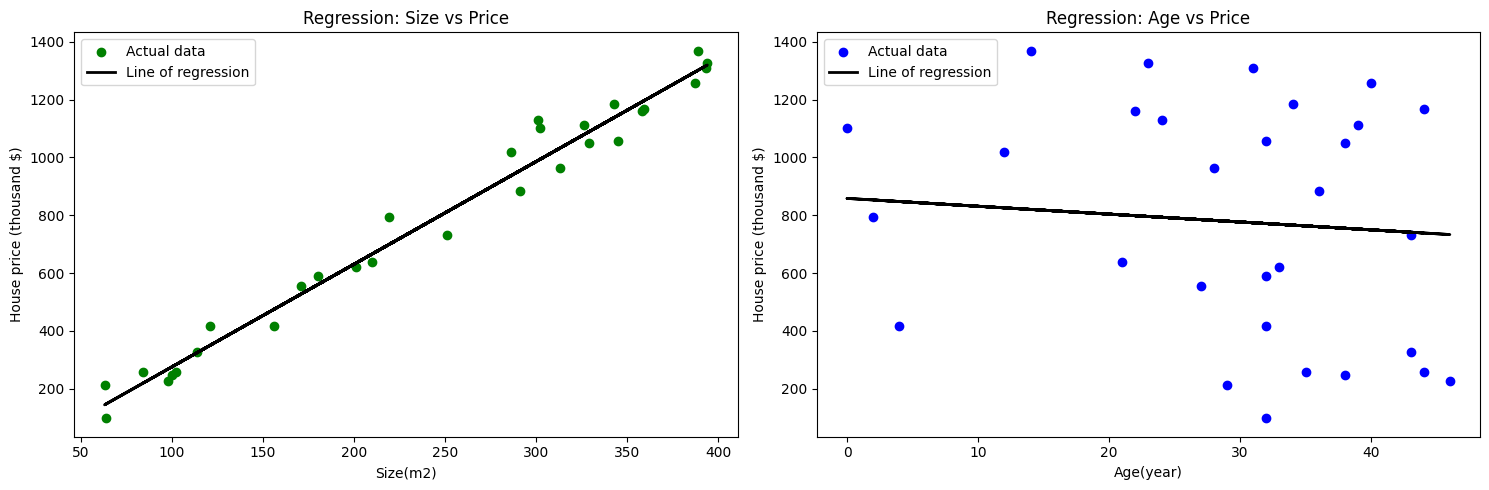

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))

features = ['Size', 'Age']
colors = ['green', 'blue']

for i, col in enumerate(features):
    axs[i].scatter(X_test[col], y_test, color=colors[i], label='Actual data')
    axs[i].set_xlabel("Size(m2)" if col=="Size" else "Age(year)")
    axs[i].set_ylabel('House price (thousand $)')
    axs[i].set_title(f'Regression: {col} vs Price')

    X_temp = X_test.copy()
    X_temp[[c for c in features if c != col]] = X_test[[c for c in features if c != col]].mean()
    y_line = model.predict(X_temp)
    
    axs[i].plot(X_test[col], y_line, color='black', linewidth=2, label='Line of regression')

    axs[i].legend()

plt.tight_layout()
plt.show()

- Khoảng cách giữa các điểm và đường hồi quy của diện tích gần hơn so với tuổi của căn nhà -> `Diện tích của căn nhà biểu thị mối tương quan rõ rệt hơn`